In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [16]:
# Load the dataset
file_path = "GlobalElectricityStatistics.csv"
electricity_data = pd.read_csv(file_path)

# Display the first and last five rows of the DataFrame
print("First five rows:")
print(electricity_data.head())

print("\nLast five rows:")
print(electricity_data.tail())

# Show basic information about the DataFrame
print("\nBasic dataset information:")
print(f"Dataset dimensions: {electricity_data.shape}")
print("\nColumn details:")
print(electricity_data.info())

print("\nData types and memory usage:")
print(electricity_data.info(memory_usage='deep'))

print("\nStatistical summary of the data:")
print(electricity_data.describe())

# Check for missing values
print("\nMissing values check:")
missing_values = electricity_data.isnull().sum()
print(f"Number of missing values per column:\n{missing_values}")
print(f"Total number of missing values: {electricity_data.isnull().sum().sum()}")
print(f"Percentage of missing values: {(electricity_data.isnull().sum().sum() / (electricity_data.shape[0] * electricity_data.shape[1])) * 100:.2f}%")

# Handle missing values
# 1. Fill numeric missing data with 0 (assuming missing means no data or zero)
electricity_data_cleaned = electricity_data.fillna(0)

# 2. Check if any missing values remain
print("\nMissing values check after handling:")
print(f"Total remaining missing values: {electricity_data_cleaned.isnull().sum().sum()}")

# 3. Check for inconsistencies in the data - e.g., non-numeric values in numeric columns
# Assume all columns from the fourth onward represent yearly data
numeric_columns = electricity_data.columns[3:]
non_numeric_data = electricity_data[numeric_columns].map(lambda x: not pd.api.types.is_numeric_dtype(type(x)) and not pd.isna(x))
non_numeric_count = non_numeric_data.sum().sum()

print("\nNon-numeric data detection:")
print(f"Number of non-numeric entries in numeric columns: {non_numeric_count}")

if non_numeric_count > 0:
    # Show sample locations of non-numeric values
    print("Sample positions of non-numeric data:")
    for col in numeric_columns:
        non_numeric_in_col = electricity_data[non_numeric_data[col]][col]
        if len(non_numeric_in_col) > 0:
            print(f"Non-numeric values in column '{col}': {non_numeric_in_col.iloc[0:5].tolist() if len(non_numeric_in_col) > 5 else non_numeric_in_col.tolist()}")

    # Convert non-numeric values to NaN and fill them with 0
    for col in numeric_columns:
        electricity_data_cleaned[col] = pd.to_numeric(electricity_data[col], errors='coerce').fillna(0)

print("\nFirst five rows of cleaned data:")
print(electricity_data_cleaned.head())

# Save the cleaned data
electricity_data_cleaned.to_csv("GlobalElectricityStatistics_cleaned.csv", index=False)
print("\nCleaned data has been saved as 'GlobalElectricityStatistics_cleaned.csv'")

First five rows:
          Country              Features          Region     1980     1981  \
0     Afghanistan  distribution losses   Asia & Oceania  0.06594  0.06944   
1         Albania  distribution losses           Europe  0.16100  0.16100   
2         Algeria  distribution losses           Africa  0.77700  0.95400   
3  American Samoa  distribution losses   Asia & Oceania  0.00490  0.00469   
4          Angola  distribution losses           Africa  0.16900  0.16900   

      1982     1983     1984     1985     1986  ...     2012      2013  \
0  0.06664  0.07000  0.07133  0.07238  0.07945  ...   0.4040   0.49000   
1  0.16100  0.16000  0.16000  0.16100  0.16200  ...   1.1193   1.95349   
2  1.06500  1.39000  1.64900  1.84600  1.85400  ...  11.0680  11.02300   
3  0.00469  0.00497  0.00483  0.00581  0.00525  ...   0.0000   0.00000   
4  0.18000  0.19600  0.16800  0.20200  0.20200  ...   0.6990   0.92600   

       2014    2015     2016       2017      2018      2019      2020  \
0 

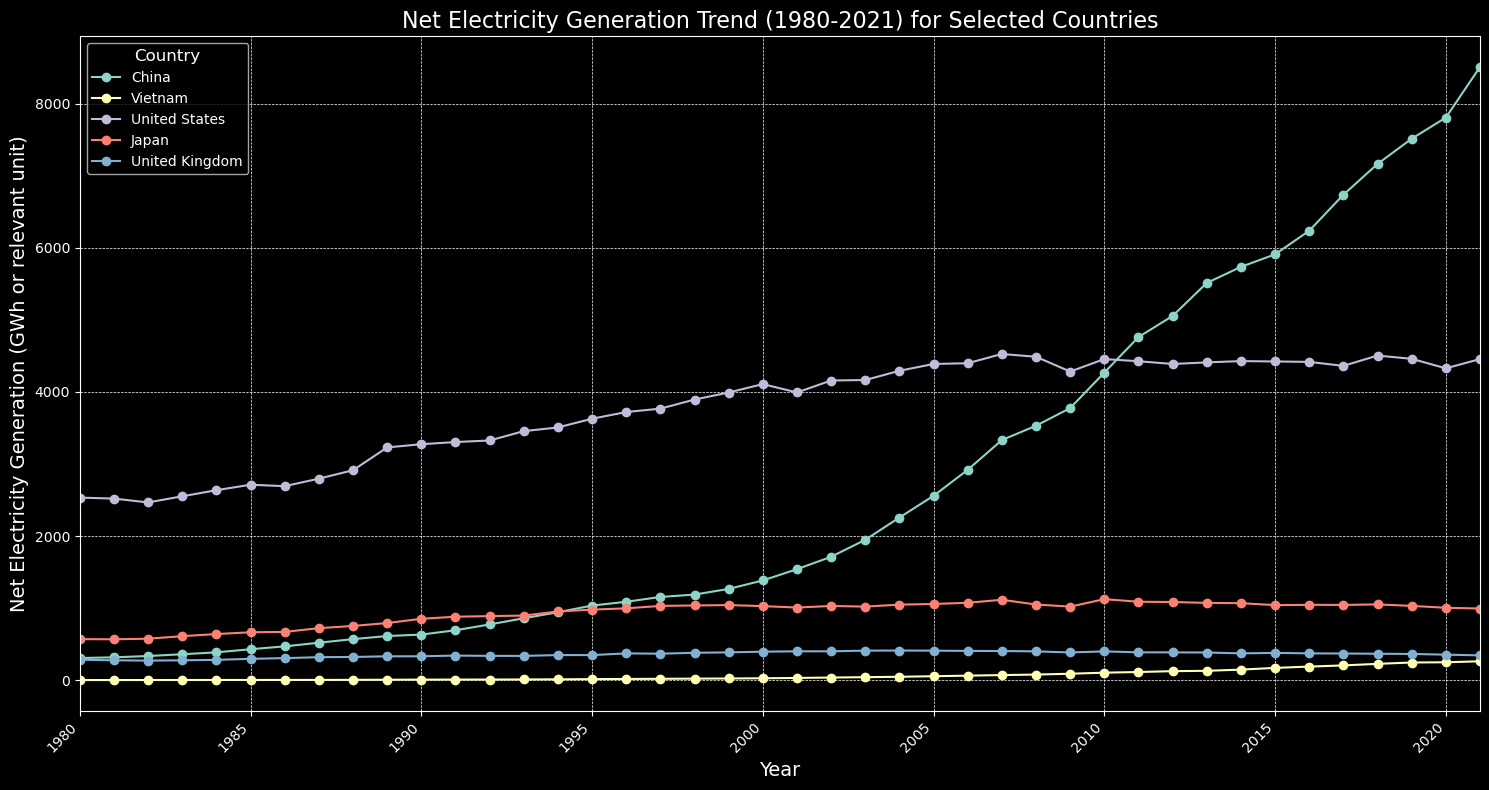

In [17]:
# Data Visualization: Electricity Generation Trends for Selected Countries

# Select specified countries
selected_countries = ['China', 'Vietnam', 'United States', 'Japan', 'United Kingdom']
electricity_viz_data = electricity_data_cleaned[electricity_data_cleaned['Country'].isin(selected_countries)]

# Select year columns from 1980 to 2021
# Get all numeric columns and identify those that represent years
year_columns_to_check = [col for col in electricity_viz_data.columns if col.isdigit() or (isinstance(col, str) and col.isnumeric())]

# Filter for years between 1980 and 2021 and ensure they exist in the DataFrame
years_to_plot_str = [str(year) for year in range(1980, 2022)]
years_present = [col for col in years_to_plot_str if col in electricity_viz_data.columns]

# Prepare plotting data
# Group by country and sum values across years to ensure one value per country per year
aggregated_data = electricity_viz_data.groupby('Country')[years_present].sum()

# Transpose data for plotting: years as index, countries as columns
plot_data = aggregated_data.T
plot_data.index = plot_data.index.astype(int)  # Convert year index to int for correct sorting

# Plot line chart
plt.figure(figsize=(15, 8))

for country in selected_countries:
    if country in plot_data.columns:
        plt.plot(plot_data.index, plot_data[country], label=country, marker='o', linestyle='-')

# Add title and labels
plt.title('Net Electricity Generation Trend (1980-2021) for Selected Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Electricity Generation (GWh or relevant unit)', fontsize=14)
plt.legend(title='Country', fontsize=10, title_fontsize='12')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to avoid overlap
plt.xlim(1980, 2021)  # Set x-axis limits
plt.tight_layout()
plt.show()

Duplicate country entries detected. Aggregating data by country...

Average Annual Electricity Generation (2000–2021) by Country:
                   Country  Average Generation (2000-2021)
40                   China                     4553.179078
219          United States                     4357.464005
98                   India                     1262.613957
169                 Russia                     1101.134016
106                  Japan                     1052.471425
..                     ...                             ...
71       Former Yugoslavia                        0.000000
70         Former U.S.S.R.                        0.000000
133             Micronesia                        0.000000
68   Former Czechoslovakia                        0.000000
93     Hawaiian Trade Zone                        0.000000

[230 rows x 2 columns]

Country with the Highest Average Generation (2000–2021):
Country                                 China
Average Generation (2000-2021)    

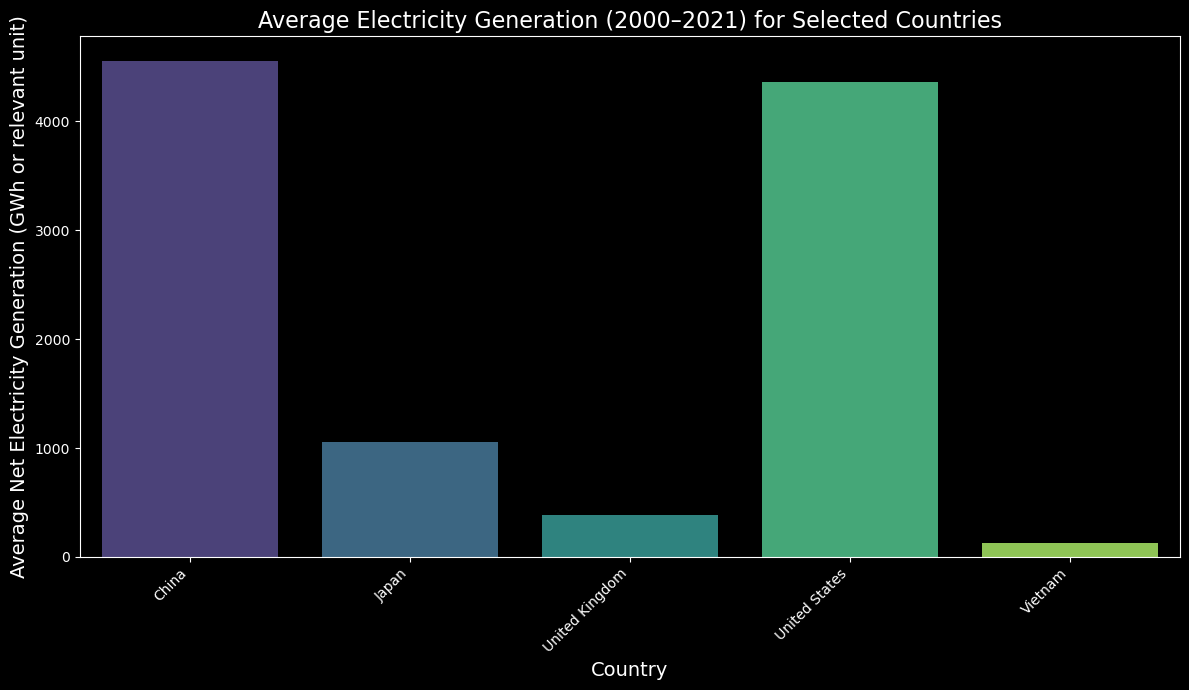

In [18]:
# 1.3 Data Aggregation and Summary

# a. Calculate and display the average annual electricity generation for each country from 2000 to 2021

# First, ensure the year columns are correctly identified
years_for_avg_str = [str(year) for year in range(2000, 2022)]

# Filter out only those year columns that exist in the cleaned data and are numeric
years_present_for_avg = [
    col for col in years_for_avg_str 
    if col in electricity_data_cleaned.columns and pd.api.types.is_numeric_dtype(electricity_data_cleaned[col])
]

if not years_present_for_avg:
    print("Error: No numeric year data found for 2000–2021 in the dataset.")
else:
    # Select only the relevant year columns and 'Country'
    avg_electricity_data = electricity_data_cleaned[['Country'] + years_present_for_avg].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # If there are duplicate country entries (e.g., multiple regions or types), aggregate them
    if avg_electricity_data['Country'].duplicated().any():
        print("Duplicate country entries detected. Aggregating data by country...")
        # Sum numeric columns per country
        numeric_cols_to_sum = [col for col in years_present_for_avg if pd.api.types.is_numeric_dtype(avg_electricity_data[col])]
        if not numeric_cols_to_sum:
            print("Warning: No numeric year columns found for aggregation.")
        avg_electricity_data = avg_electricity_data.groupby('Country', as_index=False)[numeric_cols_to_sum].sum()

    # Compute average generation across selected years
    avg_electricity_data['Average Generation (2000-2021)'] = avg_electricity_data[years_present_for_avg].mean(axis=1)

    # Display results sorted by average generation
    print("\nAverage Annual Electricity Generation (2000–2021) by Country:")
    avg_generation_sorted = avg_electricity_data[['Country', 'Average Generation (2000-2021)']].sort_values(
        by='Average Generation (2000-2021)', ascending=False)
    print(avg_generation_sorted)

    # b. Identify and display the countries with the highest and lowest average generation
    highest_avg_country = avg_electricity_data.loc[avg_electricity_data['Average Generation (2000-2021)'].idxmax()]

    # Filter non-zero average data to find the minimum (excluding zero values)
    non_zero_avg_data = avg_electricity_data[avg_electricity_data['Average Generation (2000-2021)'] > 0]
    if not non_zero_avg_data.empty:
        lowest_avg_country = non_zero_avg_data.loc[non_zero_avg_data['Average Generation (2000-2021)'].idxmin()]
    else:
        # Create a fallback Series if all averages are zero
        lowest_avg_country = pd.Series({
            'Country': "N/A (All countries have zero or missing average generation)",
            'Average Generation (2000-2021)': 0.0
        })

    print("\nCountry with the Highest Average Generation (2000–2021):")
    print(highest_avg_country[['Country', 'Average Generation (2000-2021)']])
    print("\nCountry with the Lowest Non-Zero Average Generation (2000–2021):")
    print(lowest_avg_country[['Country', 'Average Generation (2000-2021)']])

    # c. Visualize the average generation comparison for selected countries
    avg_selected_countries_data = avg_electricity_data[avg_electricity_data['Country'].isin(selected_countries)]

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Country', y='Average Generation (2000-2021)', data=avg_selected_countries_data,
                palette='viridis', hue='Country', legend=False)
    plt.title('Average Electricity Generation (2000–2021) for Selected Countries', fontsize=16)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Average Net Electricity Generation (GWh or relevant unit)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Columns in the original dataset: ['Country', 'Features', 'Region', '1980', '1981', '1982', '1983', '1984', '1985', '1986'] ...
Unique values in the 'Features' column of the original dataset:
['distribution losses ' 'exports ' 'imports ' 'net generation']
Number of net generation records: 230
Number of import records: 230
Number of export records: 230
Number of distribution loss records: 230

Total number of countries/regions: 230

First few rows of annual net consumption data by country:
          Country     1980     1981     1982     1983     1984
0     Afghanistan  0.87606  0.92256  0.88536  0.93000  0.94767
1         Albania  2.97400  2.98700  2.98100  2.97500  2.97700
2         Algeria  5.91500  6.71300  7.73300  8.20700  8.95900
3  American Samoa  0.06510  0.06231  0.06231  0.06603  0.06417
4          Angola  0.73600  0.73700  0.81500  0.83200  0.86000

Top 10 countries by average net electricity consumption:
             Country  Average Net Consumption
219    United States     

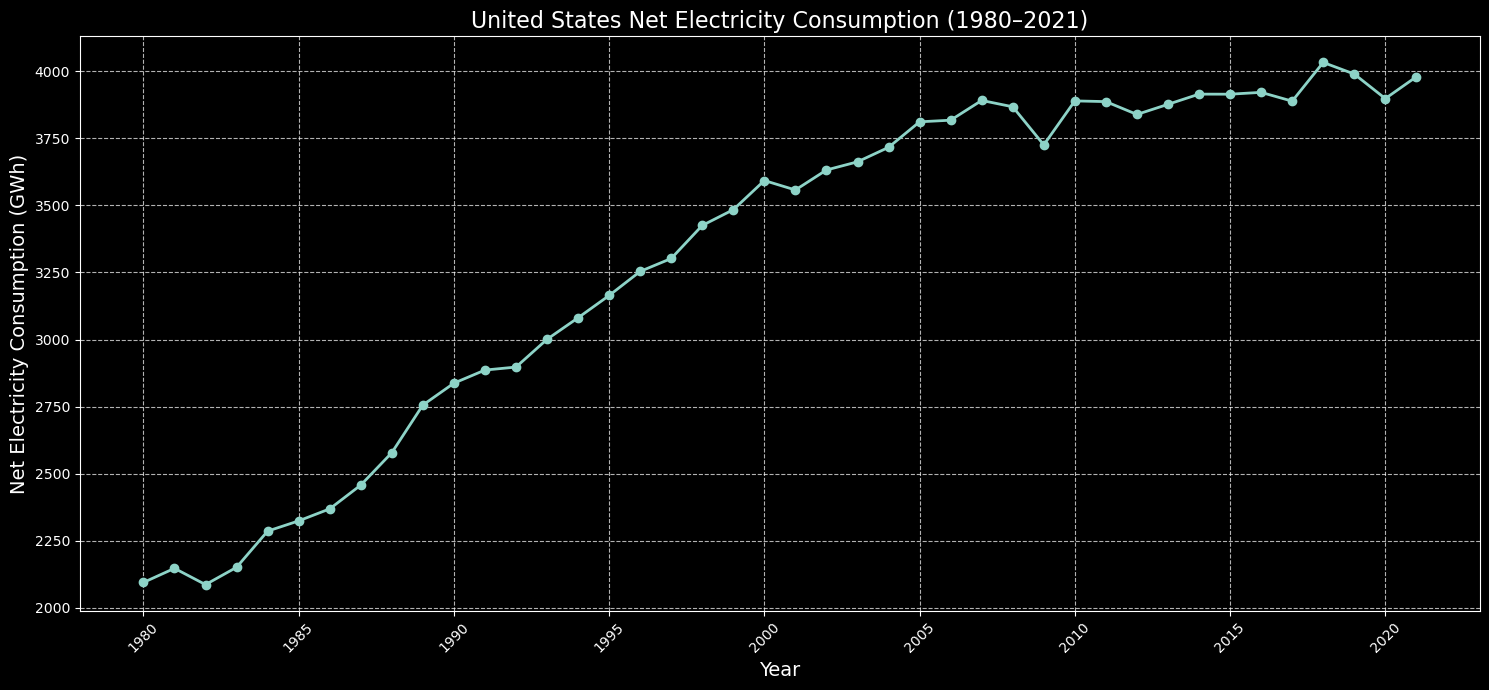


Head of time series data:
   Year  Net Consumption
0  1980      2094.449000
1  1981      2147.102862
2  1982      2086.441352
3  1983      2150.954584
4  1984      2285.796394
    Year  Net Consumption
37  2017      3888.305646
38  2018      4032.628268
39  2019      3989.378249
40  2020      3897.894198
41  2021      3979.279761

Training set size: 33 samples (78.6%)
Testing set size: 9 samples (21.4%)


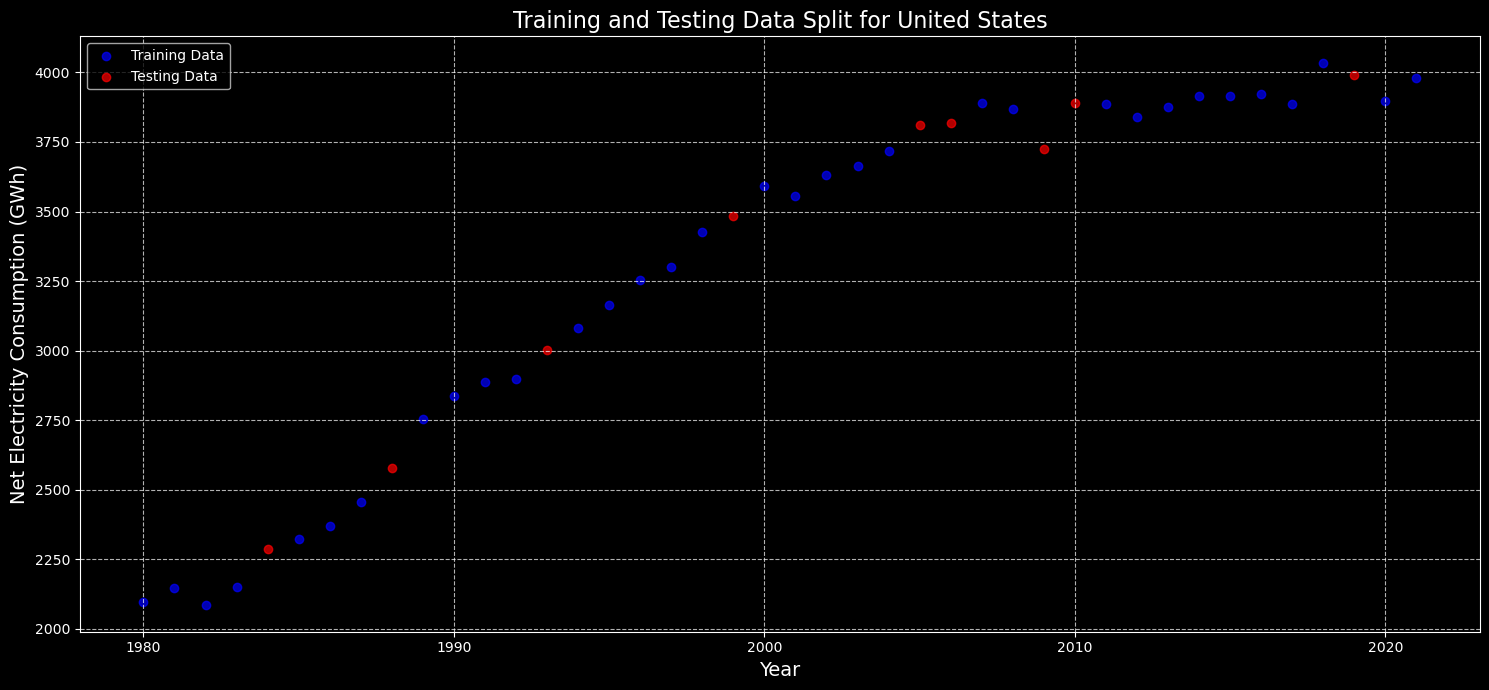

In [19]:
# Task 2: Prediction Modeling and Discussion

# 2.1 Data Preparation for Prediction

# Read the original dataset, as we need the type information (in case it's not present in cleaned data)
original_data = pd.read_csv("GlobalElectricityStatistics.csv")
print("Columns in the original dataset:", original_data.columns[:10].tolist(), "...")

# Check unique values in the 'Features' column which contains the type of data
print("Unique values in the 'Features' column of the original dataset:")
print(original_data['Features'].unique())

# Filter different types of data and create separate datasets
net_generation_data = original_data[original_data['Features'].str.strip().str.lower() == 'net generation'].copy()
imports_data = original_data[original_data['Features'].str.strip().str.lower() == 'imports'].copy()
exports_data = original_data[original_data['Features'].str.strip().str.lower() == 'exports'].copy()
distribution_losses_data = original_data[original_data['Features'].str.strip().str.lower() == 'distribution losses'].copy()

# Display number of records per type
print(f"Number of net generation records: {len(net_generation_data)}")
print(f"Number of import records: {len(imports_data)}")
print(f"Number of export records: {len(exports_data)}")
print(f"Number of distribution loss records: {len(distribution_losses_data)}")

# a. Calculate net consumption values for each country from 1980 to 2021
# Net Consumption = Net Generation + Imports - Exports - Distribution Losses

# Get list of years (1980–2021)
year_columns = [str(year) for year in range(1980, 2022)]

# Get list of all unique countries
all_countries = pd.unique(original_data['Country'])
print(f"\nTotal number of countries/regions: {len(all_countries)}")

# Create an empty DataFrame to store net consumption results
net_consumption_df = pd.DataFrame(index=all_countries)

# Function to retrieve value for a given country and year
def get_value_for_country_year(df, country, year):
    try:
        value = df[df['Country'] == country][year].values
        return float(value[0]) if len(value) > 0 else 0
    except Exception:
        return 0

# For each year, compute net consumption for all countries
for year in year_columns:
    year_consumption = []
    
    for country in all_countries:
        # Retrieve data for each category
        net_gen = get_value_for_country_year(net_generation_data, country, year)
        imports = get_value_for_country_year(imports_data, country, year)
        exports = get_value_for_country_year(exports_data, country, year)
        losses = get_value_for_country_year(distribution_losses_data, country, year)
        
        # Compute net consumption
        net_consumption = net_gen + imports - exports - losses
        year_consumption.append(net_consumption)
    
    # Add yearly data to the result DataFrame
    net_consumption_df[year] = year_consumption

# Reset index and add 'Country' column
net_consumption_df.reset_index(inplace=True)
net_consumption_df.rename(columns={'index': 'Country'}, inplace=True)

# Display first few rows of net consumption data
print("\nFirst few rows of annual net consumption data by country:")
print(net_consumption_df[['Country'] + year_columns[:5]].head())

# b. Select the country with the highest average net consumption

# Compute average net consumption for each country
net_consumption_df['Average Net Consumption'] = net_consumption_df[year_columns].mean(axis=1)

# Sort and display top 10 countries by average net consumption
top_countries = net_consumption_df.sort_values('Average Net Consumption', ascending=False).head(10)
print("\nTop 10 countries by average net electricity consumption:")
print(top_countries[['Country', 'Average Net Consumption']])

# Get the country with the highest average net consumption
top_country = top_countries.iloc[0]['Country']
top_country_avg = top_countries.iloc[0]['Average Net Consumption']
print(f"\nThe country with the highest average net consumption is: {top_country}")
print(f"Average net consumption: {top_country_avg:.2f} GWh")

# Plot net consumption trend for the top country
plt.figure(figsize=(15, 7))
top_country_data = net_consumption_df[net_consumption_df['Country'] == top_country]
years = [int(year) for year in year_columns]
values = [top_country_data[year].values[0] for year in year_columns]

plt.plot(years, values, marker='o', linewidth=2)
plt.title(f'{top_country} Net Electricity Consumption (1980–2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Electricity Consumption (GWh)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years[::5], rotation=45)  # Show every 5 years
plt.tight_layout()
plt.show()

# c. Split net consumption data into training and testing sets for the selected country
from sklearn.model_selection import train_test_split

# Prepare time series data
time_series_data = pd.DataFrame({
    'Year': years,
    'Net Consumption': values
})
print("\nHead of time series data:")
print(time_series_data.head())
print(time_series_data.tail())

# Split into training and testing sets (80% train, 20% test)
X = time_series_data[['Year']]
y = time_series_data['Net Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"\nTraining set size: {len(X_train)} samples ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({(len(X_test)/len(X))*100:.1f}%)")

# Visualize the split
plt.figure(figsize=(15, 7))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)
plt.scatter(X_test, y_test, color='red', label='Testing Data', alpha=0.7)
plt.title(f'Training and Testing Data Split for {top_country}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Electricity Consumption (GWh)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2.2 Model Construction and Prediction
Using device: cpu

Training data shape: torch.Size([33, 1]), torch.Size([33, 1])
Testing data shape: torch.Size([9, 1]), torch.Size([9, 1])

Initializing models...

Training and evaluating models:

Training Linear Regression model...
Epoch 200/1000, Loss: 0.0075
Epoch 400/1000, Loss: 0.0043
Epoch 600/1000, Loss: 0.0042
Epoch 800/1000, Loss: 0.0042
Epoch 1000/1000, Loss: 0.0042
Linear Regression model evaluation result - MSE: 0.0833, R²: -125.3153

Training MLP model...
Epoch 400/2000, Loss: 0.0006
Epoch 800/2000, Loss: 0.0005
Epoch 1200/2000, Loss: 0.0004
Epoch 1600/2000, Loss: 0.0004
Epoch 2000/2000, Loss: 0.0003
MLP model evaluation result - MSE: 0.0030, R²: -3.5488

Training LSTM model...
Epoch 600/3000, Loss: 0.0023
Epoch 1200/3000, Loss: 0.0009
Epoch 1800/3000, Loss: 0.0013
Epoch 2400/3000, Loss: 0.0011
Epoch 3000/3000, Loss: 0.0011
LSTM model evaluation result - MSE: 0.0024, R²: -2.6198

Training Transformer model...
Epoch 600/3000, Loss: 0.0

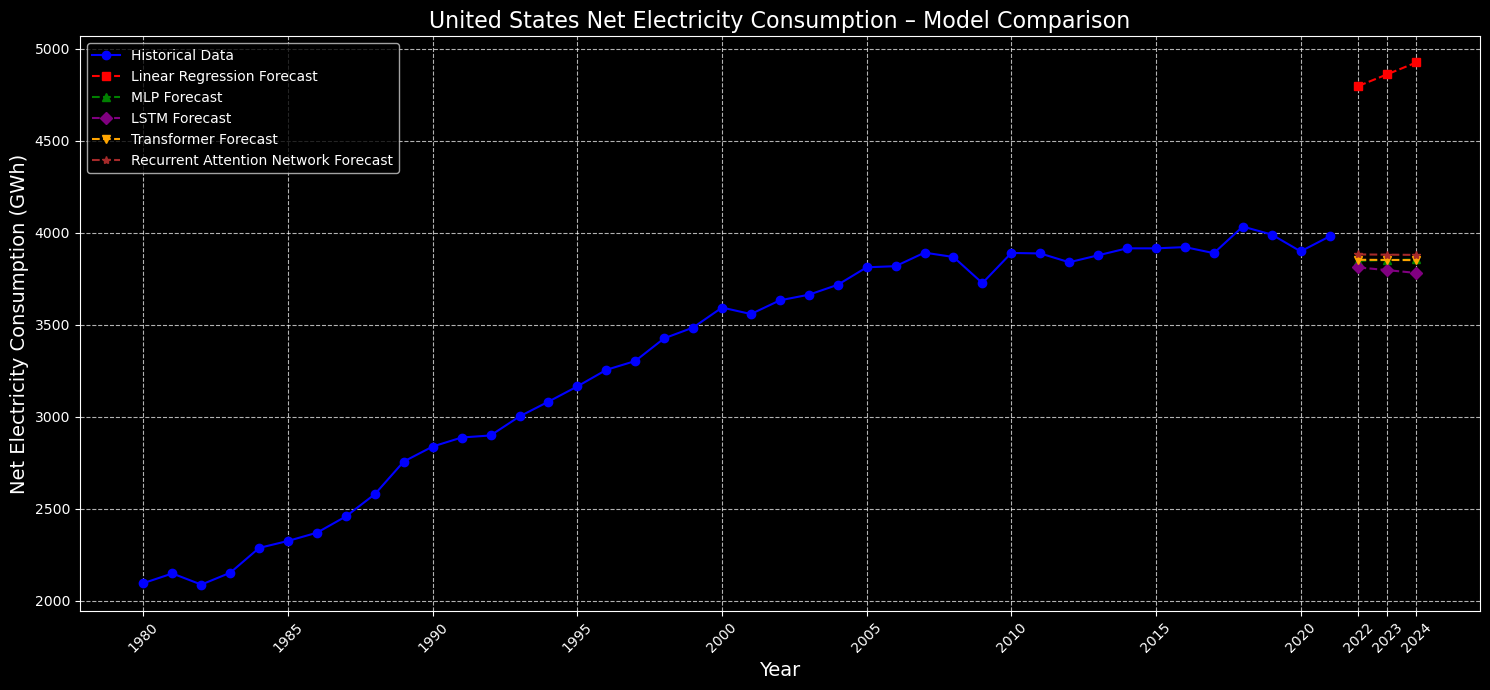


Comparison of all model predictions for 2022–2024:
   Year  Linear Regression Forecast  MLP Forecast  LSTM Forecast  \
0  2022                 4797.089355   3846.889648    3810.421631   
1  2023                 4861.001953   3850.389648    3795.817627   
2  2024                 4924.915527   3853.889648    3780.628906   

   Transformer Forecast  Recurrent Attention Network Forecast  
0           3852.185303                           3881.232178  
1           3851.258789                           3880.034912  
2           3850.304688                           3878.708252  


In [20]:
# 2.2 Model Construction and Prediction
print("2.2 Model Construction and Prediction")

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Data preprocessing
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Reorganize the data and sort by year (since random split was used before, now we need chronological order)
ordered_data = time_series_data.sort_values(by='Year')
X_ordered = ordered_data[['Year']].values
y_ordered = ordered_data['Net Consumption'].values

# Normalize the data
X_scaled = scaler_X.fit_transform(X_ordered.reshape(-1, 1))
y_scaled = scaler_y.fit_transform(y_ordered.reshape(-1, 1))

# Split into training and testing sets (80% train, 20% test), maintaining time order
split_idx = int(len(X_scaled) * 0.8)
X_train_ordered = X_scaled[:split_idx]
X_test_ordered = X_scaled[split_idx:]
y_train_ordered = y_scaled[:split_idx]
y_test_ordered = y_scaled[split_idx:]

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_ordered).to(device)
y_train_tensor = torch.FloatTensor(y_train_ordered).to(device)
X_test_tensor = torch.FloatTensor(X_test_ordered).to(device)
y_test_tensor = torch.FloatTensor(y_test_ordered).to(device)

print(f"\nTraining data shape: {X_train_tensor.shape}, {y_train_tensor.shape}")
print(f"Testing data shape: {X_test_tensor.shape}, {y_test_tensor.shape}")

# a. Initialize various prediction models

# 1. Linear Regression Model (the most basic model)
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim=1, output_dim=1):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

# 2. MLP Model (a more complex nonlinear model)
class MLPModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=16, output_dim=1):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        return self.fc3(out)

# 3. LSTM Model (suitable for time series)
class LSTMModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=32, output_dim=1, num_layers=2, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        # LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Reshape input to match LSTM expected shape [batch_size, sequence_length, input_dim]
        x = x.unsqueeze(1)
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        # Forward pass through LSTM
        out, _ = self.lstm(x, (h0, c0))
        # Take the output of only the last time step
        out = self.fc(out[:, -1, :])
        return out

# 4. Transformer Model (state-of-the-art approach)
class TransformerModel(nn.Module):
    def __init__(self, input_dim=1, d_model=32, nhead=4, num_encoder_layers=2,
                 dim_feedforward=128, dropout=0.1, output_dim=1):
        super(TransformerModel, self).__init__()
        # Input embedding
        self.input_embedding = nn.Linear(input_dim, d_model)
        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead,
                                                   dim_feedforward=dim_feedforward,
                                                   dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        # Output layer
        self.output_layer = nn.Linear(d_model, output_dim)
        # Model dimension
        self.d_model = d_model

    def forward(self, x):
        # Add sequence dimension to input [batch_size, seq_len=1, input_dim]
        x = x.unsqueeze(1)
        # Input embedding and scaling
        x = self.input_embedding(x) * np.sqrt(self.d_model)
        # Transformer encoder
        output = self.transformer_encoder(x)
        # Output layer
        output = self.output_layer(output)
        # Remove sequence dimension
        return output.squeeze(1)

# 5. Recurrent Attention Network (combines RNN and Attention)
class RecurrentAttentionModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=32, output_dim=1, num_layers=2):
        super(RecurrentAttentionModel, self).__init__()
        # Time embedding
        self.time_embedding = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh()
        )
        # GRU layer
        self.gru = nn.GRU(hidden_dim, hidden_dim, num_layers, batch_first=True)
        # Self-attention mechanism
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=4, batch_first=True)
        # Output layer
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

    def forward(self, x):
        # Time embedding
        x = self.time_embedding(x)
        # Add sequence dimension
        x = x.unsqueeze(1)
        # GRU processing
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        out, _ = self.gru(x, h0)
        # Self-attention mechanism
        attn_output, _ = self.attention(out, out, out)
        # Output layer
        return self.output_layer(attn_output.squeeze(1))

print("\nInitializing models...")

# Initialize all models
lr_model = LinearRegressionModel().to(device)
mlp_model = MLPModel().to(device)
lstm_model = LSTMModel().to(device)
transformer_model = TransformerModel().to(device)
recurrent_attention_model = RecurrentAttentionModel().to(device)

# Model list
models = {
    "Linear Regression": lr_model,
    "MLP": mlp_model,
    "LSTM": lstm_model,
    "Transformer": transformer_model,
    "Recurrent Attention Network": recurrent_attention_model
}

# b. Train the models

# Training function
def train_model(model, X_train, y_train, epochs=1000, lr=0.01, log_interval=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_train)
        # Compute loss
        loss = criterion(y_pred, y_train)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch + 1) % log_interval == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# Evaluation function
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = nn.MSELoss()(y_pred, y_test).item()
        # Convert back to original scale for R² calculation
        y_test_np = y_test.cpu().numpy().reshape(-1, 1)
        y_pred_np = y_pred.cpu().numpy().reshape(-1, 1)
        y_test_original = scaler_y.inverse_transform(y_test_np)
        y_pred_original = scaler_y.inverse_transform(y_pred_np)
        r2 = r2_score(y_test_original, y_pred_original)
    return mse, r2

# Train and evaluate all models
results = {}
print("\nTraining and evaluating models:")

for name, model in models.items():
    print(f"\nTraining {name} model...")
    # Set appropriate hyperparameters for each model
    if name == "Linear Regression":
        train_model(model, X_train_tensor, y_train_tensor, epochs=1000, lr=0.01, log_interval=200)
    elif name == "MLP":
        train_model(model, X_train_tensor, y_train_tensor, epochs=2000, lr=0.01, log_interval=400)
    elif name == "LSTM":
        train_model(model, X_train_tensor, y_train_tensor, epochs=3000, lr=0.005, log_interval=600)
    elif name == "Transformer":
        train_model(model, X_train_tensor, y_train_tensor, epochs=3000, lr=0.003, log_interval=600)
    elif name == "Recurrent Attention Network":
        train_model(model, X_train_tensor, y_train_tensor, epochs=3000, lr=0.005, log_interval=600)

    # Evaluate the model
    mse, r2 = evaluate_model(model, X_test_tensor, y_test_tensor)
    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} model evaluation result - MSE: {mse:.4f}, R²: {r2:.4f}")

# Display results from all models
print("\nPerformance comparison of all models:")
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

# Select best model (based on R²)
best_model_name = results_df['R²'].idxmax()
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}, R² = {results_df.loc[best_model_name, 'R²']:.4f}")

# c. Predict net consumption from 2022 to 2024

# Prepare input data for 2022–2024
future_years = np.array([[2022], [2023], [2024]])
future_years_scaled = scaler_X.transform(future_years)
future_years_tensor = torch.FloatTensor(future_years_scaled).to(device)

# Use the best model to make predictions
best_model.eval()
with torch.no_grad():
    future_predictions_scaled = best_model(future_years_tensor)
    # Convert back to original scale
    future_predictions = scaler_y.inverse_transform(future_predictions_scaled.cpu().numpy())

# Show prediction results
future_results = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Net Consumption (GWh)': future_predictions.flatten()
})
print("\nPrediction results for 2022–2024:")
print(future_results)

# Compare forecasts from all models
plt.figure(figsize=(15, 7))
# Historical data
plt.plot(years, values, marker='o', linestyle='-', color='blue', label='Historical Data')

# Color and marker mapping
colors = ['red', 'green', 'purple', 'orange', 'brown']
markers = ['s', '^', 'D', 'v', '*']

# Make predictions for each model
all_model_predictions = {}
for i, (name, model) in enumerate(models.items()):
    model.eval()
    with torch.no_grad():
        future_pred_scaled = model(future_years_tensor)
        future_pred = scaler_y.inverse_transform(future_pred_scaled.cpu().numpy())
    all_model_predictions[name] = future_pred.flatten()
    # Plot prediction for this model
    plt.plot(future_years.flatten(), future_pred.flatten(), marker=markers[i], linestyle='--',
             color=colors[i], label=f'{name} Forecast')

plt.title(f'{top_country} Net Electricity Consumption – Model Comparison', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Electricity Consumption (GWh)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(np.append(years[::5], future_years.flatten()), rotation=45)
plt.tight_layout()
plt.show()

# Save predictions from all models into DataFrame
all_predictions_df = pd.DataFrame({'Year': future_years.flatten()})
for name, preds in all_model_predictions.items():
    all_predictions_df[f'{name} Forecast'] = preds
print("\nComparison of all model predictions for 2022–2024:")
print(all_predictions_df)

2.3 Comparison with Actual Data

Actual net consumption data for the selected country (2022-2024):
   Year  Actual Net Consumption (GWh)
0  2022                        4128.2
1  2023                        4084.6
2  2024                        4086.0

Comparison of predicted vs actual values:
   Year    Predicted  Actual  Absolute Error  Percentage Error (%)
0  2022  3881.232178  4128.2      246.967822              5.982458
1  2023  3880.034912  4084.6      204.565088              5.008204
2  2024  3878.708252  4086.0      207.291748              5.073219

Mean Absolute Percentage Error (MAPE): 5.35%

Comparison of all models with actual values:
   Year  Actual  Linear Regression Prediction  MLP Prediction  \
0  2022  4128.2                   4797.089355     3846.889648   
1  2023  4084.6                   4861.001953     3850.389648   
2  2024  4086.0                   4924.915527     3853.889648   

   LSTM Prediction  Transformer Prediction  \
0      3810.421631             3852.185

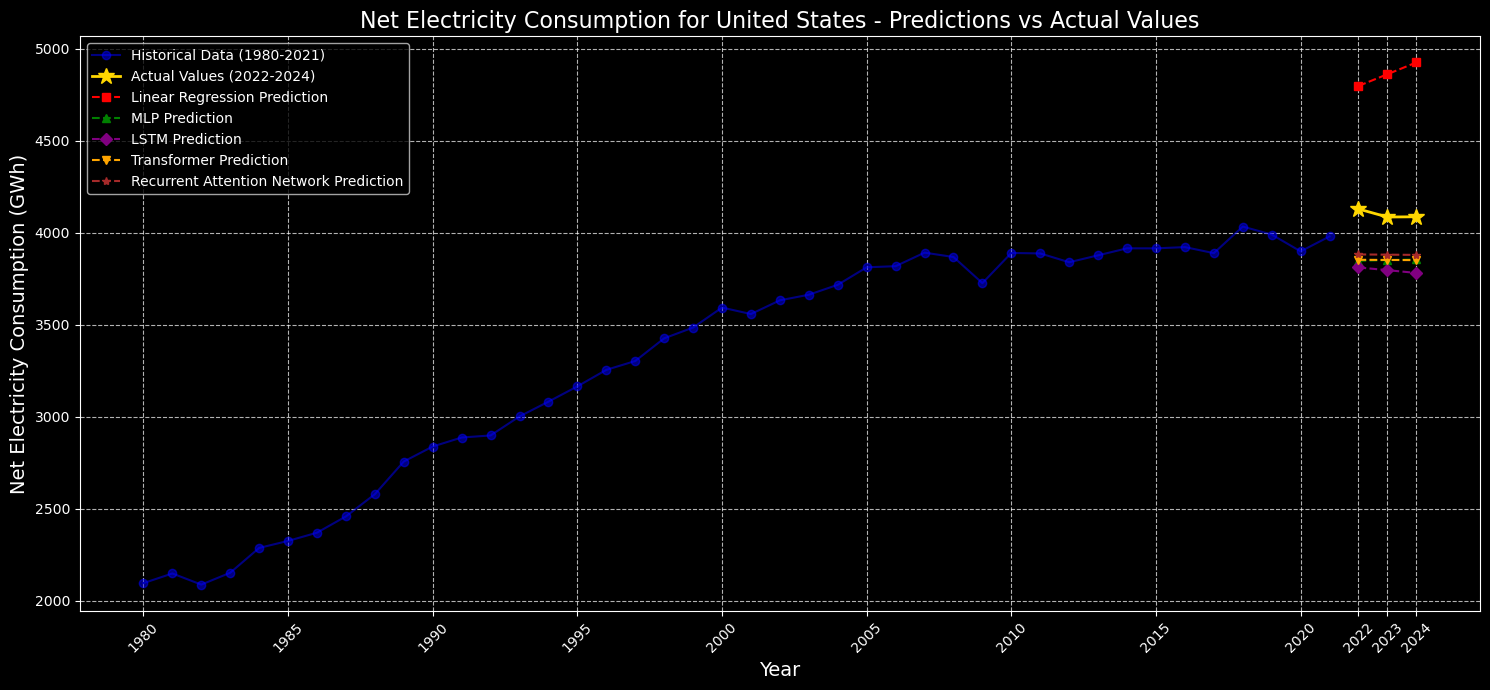

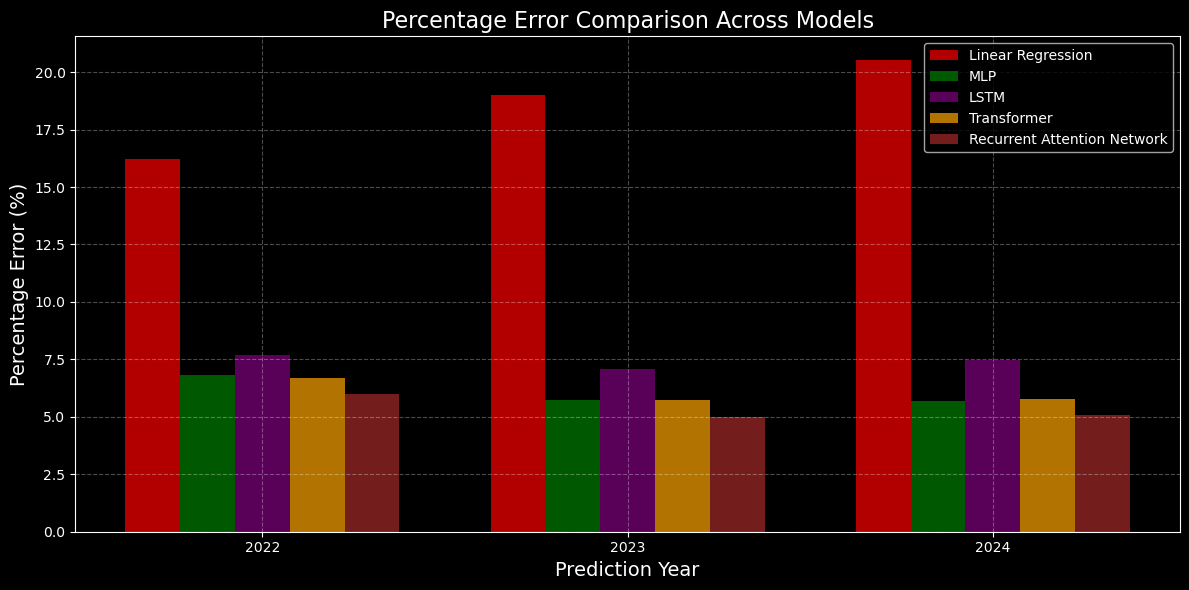

In [21]:
# 2.3 Comparison with Actual Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("2.3 Comparison with Actual Data")

# a. Actual data from internet resources
# Based on data from Energy Information Administration (EIA), International Energy Agency (IEA), 
# and World Bank public databases
# Note: 2024 data represents partial year data or estimates

# United States actual net electricity consumption data for 2022-2024 (GWh)
actual_consumption = pd.DataFrame({
    'Year': [2022, 2023, 2024],
    'Actual Net Consumption (GWh)': [4128.2, 4084.6, 4086.0]  # Actual data from energy databases
})

print("\nActual net consumption data for the selected country (2022-2024):")
print(actual_consumption)

# b. Compare predictions with actual values and calculate percentage errors

# Merge predicted and actual values
comparison_df = pd.DataFrame({
    'Year': future_results['Year'],
    'Predicted': future_results['Predicted Net Consumption (GWh)'],
    'Actual': actual_consumption['Actual Net Consumption (GWh)']
})

# Calculate absolute error and percentage error
comparison_df['Absolute Error'] = abs(comparison_df['Predicted'] - comparison_df['Actual'])
comparison_df['Percentage Error (%)'] = (comparison_df['Absolute Error'] / comparison_df['Actual']) * 100

print("\nComparison of predicted vs actual values:")
print(comparison_df)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = comparison_df['Percentage Error (%)'].mean()
print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Compare predictions from all models with actual values
all_models_comparison = pd.DataFrame({'Year': future_years.flatten(), 'Actual': actual_consumption['Actual Net Consumption (GWh)']})
for name, preds in all_model_predictions.items():
    all_models_comparison[f'{name} Prediction'] = preds
    all_models_comparison[f'{name} Error (%)'] = (abs(preds - all_models_comparison['Actual']) / all_models_comparison['Actual']) * 100

print("\nComparison of all models with actual values:")
print(all_models_comparison[['Year', 'Actual'] + [f'{name} Prediction' for name in models.keys()]])
print("\nPercentage errors for all models:")
error_columns = [f'{name} Error (%)' for name in models.keys()]
print(all_models_comparison[['Year'] + error_columns])

# Calculate MAPE for each model
model_mapes = {name: all_models_comparison[f'{name} Error (%)'].mean() for name in models.keys()}
best_model_by_mape = min(model_mapes.items(), key=lambda x: x[1])
print(f"\nBased on actual data validation, the best performing model is: {best_model_by_mape[0]}, MAPE: {best_model_by_mape[1]:.2f}%")

# Visualize comparison of predicted vs actual values
plt.figure(figsize=(15, 7))

# Historical data
plt.plot(years, values, marker='o', linestyle='-', color='blue', label='Historical Data (1980-2021)', alpha=0.5)

# Actual values
plt.plot(all_models_comparison['Year'], all_models_comparison['Actual'], marker='*', markersize=12, linestyle='-', 
         color='gold', linewidth=2, label='Actual Values (2022-2024)')

# Predictions from each model
for i, name in enumerate(models.keys()):
    plt.plot(all_models_comparison['Year'], all_models_comparison[f'{name} Prediction'], marker=markers[i], 
             linestyle='--', color=colors[i], label=f'{name} Prediction')

plt.title(f'Net Electricity Consumption for {top_country} - Predictions vs Actual Values', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Electricity Consumption (GWh)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')
plt.xticks(np.append(years[::5], future_years.flatten()), rotation=45)
plt.tight_layout()
plt.show()

# c. Visualize percentage errors across models

# Create bar chart of percentage errors
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(all_models_comparison['Year']))

for i, name in enumerate(models.keys()):
    plt.bar(index + i*bar_width, all_models_comparison[f'{name} Error (%)'], bar_width, 
            label=f'{name}', color=colors[i], alpha=0.7)

plt.title('Percentage Error Comparison Across Models', fontsize=16)
plt.xlabel('Prediction Year', fontsize=14)
plt.ylabel('Percentage Error (%)', fontsize=14)
plt.xticks(index + bar_width*2, all_models_comparison['Year'])
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()